In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\booos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\booos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pmaw import PushshiftAPI
import matplotlib.pyplot as plt
import math
from datetime import datetime
import datetime as dt
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import re
import string
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-1c1c12436d94>:26: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
buy = pd.read_csv('buy_comments.csv', low_memory=False)
sell = pd.read_csv('sell_comments.csv', low_memory=False)
mortgage = pd.read_csv('mortgage_comments.csv', low_memory=False)
submissions =  pd.read_csv('buy_submissions.csv', low_memory=False)

In [7]:
buy

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,distinguished,gilded,retrieved_utc,score_hidden,subreddit_name_prefixed,subreddit_type,unrepliable_reason,author_cakeday,edited,steward_reports
0,[],NaN,AcresCRE,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,Ciaobello10,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,AcresCRE,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,ticketguy508,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,TitusTheWolf,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,[],NaN,melikestoread,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,0.0,1.632325e+09,False,r/realestateinvesting,public,NaN,NaN,NaN,NaN
26924,[],NaN,LoudLizard,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,0.0,1.632321e+09,False,r/realestateinvesting,public,NaN,NaN,NaN,NaN
26925,[],NaN,secondphase,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26926,[],NaN,TNDO91,NaN,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
relevant_columns=['body','score','total_awards_received','created_utc','author','permalink']

In [9]:
buy = buy[relevant_columns]
sell = sell[relevant_columns]
mortgage = mortgage[relevant_columns]
# submissions = submissions[relevant_columns]
# buy.info()

In [10]:
def unix_to_date(input):
    ts = int(input)
    print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
def wordcloud_maker(df, feature):
    wordcloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'viridis', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "black").generate(" ".join(df[feature]))
    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud)
    plt.title(f'{feature} Wordcloud', fontsize=32, fontweight='bold')
    plt.axis('off')

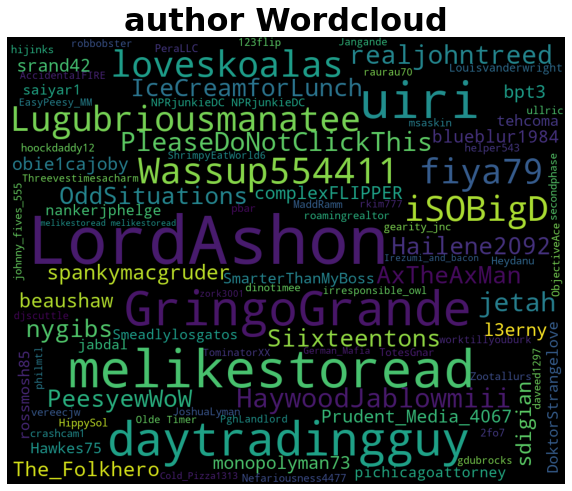

In [12]:
wordcloud_maker(buy, 'author')

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
cand_mask=np.array(Image.open('house_png_1.png'))

In [14]:
cand_mask=np.where(cand_mask < 3, 255, cand_mask)

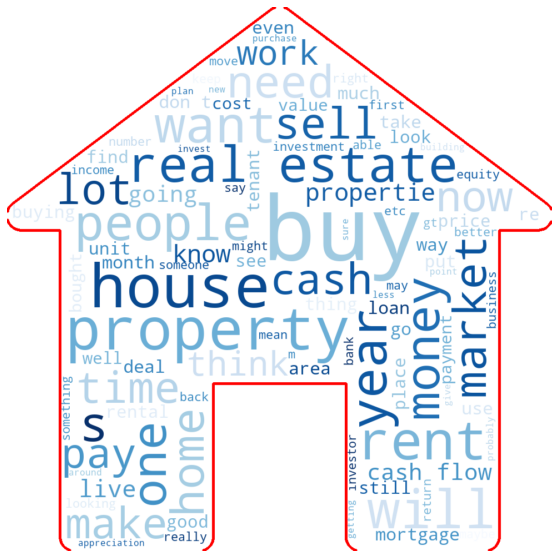

In [15]:
wordcloud = WordCloud(background_color='white',
                      contour_color='red',
                      mask=cand_mask, 
                      colormap='Blues',
                      max_words=100,
                      contour_width=6).generate(" ".join(buy['body']))


#plot
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
def wordcloud_maker_1(df, feature):
    wordcloud = WordCloud(
                       colormap = 'viridis', 
                       margin = 0,
                       max_words = 200,
                       mask=cand_mask,
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "black").generate(" ".join(df[feature]))
    plt.figure(figsize = (10, 15))
    plt.imshow(wordcloud)
    plt.title(f'{feature} Wordcloud', fontsize=25, fontweight='bold')
    plt.axis('off')

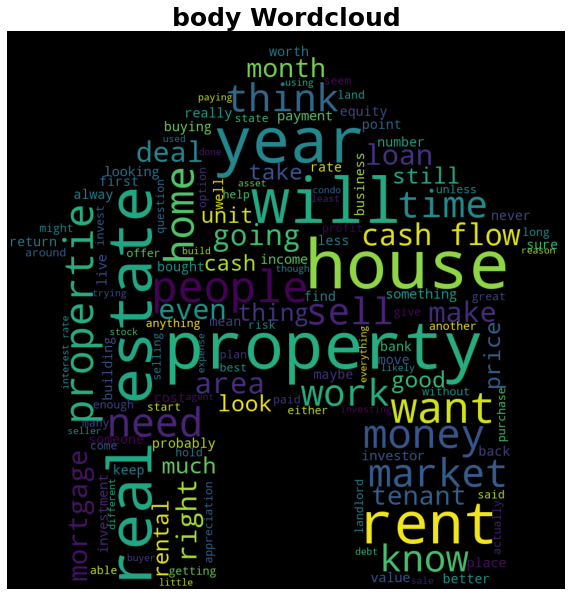

In [17]:
wordcloud_maker_1(buy, 'body')

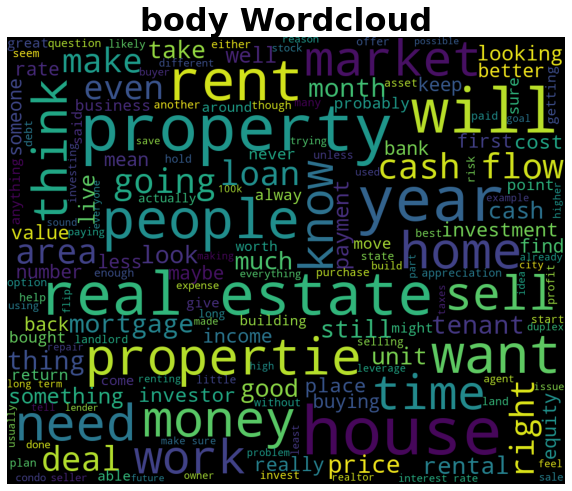

In [18]:
wordcloud_maker(buy, 'body')

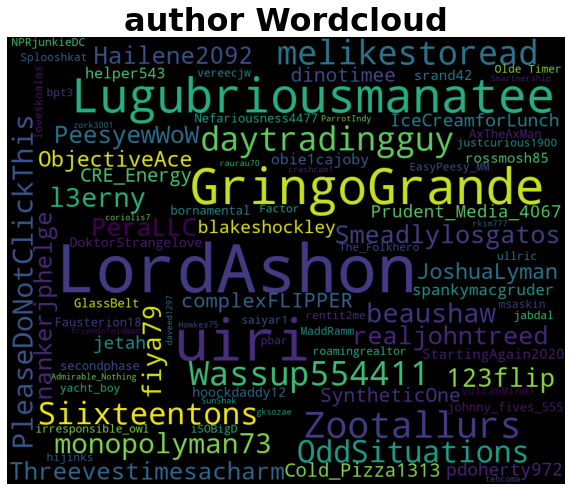

In [19]:
wordcloud_maker(sell, 'author')

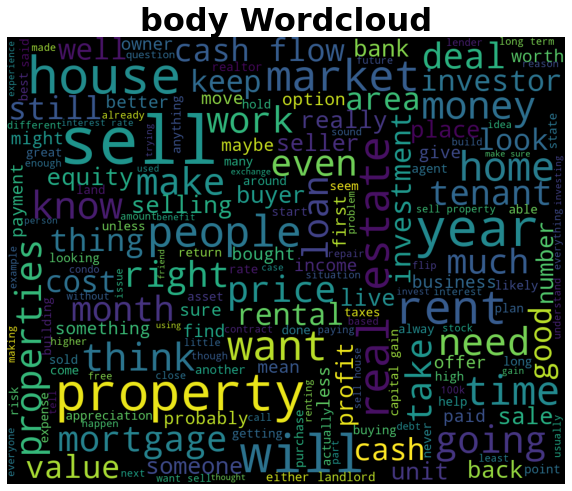

In [20]:
wordcloud_maker(sell, 'body')

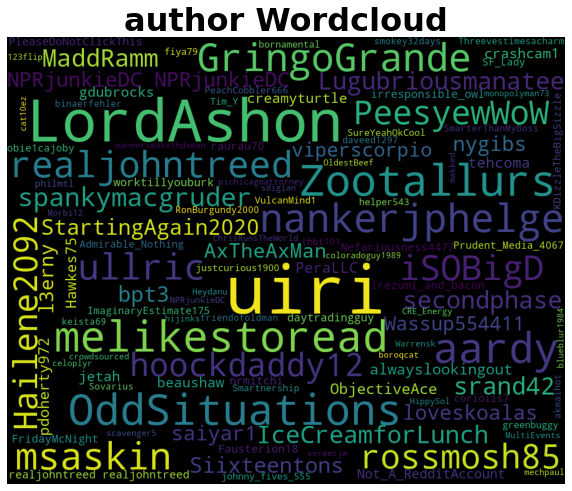

In [21]:
wordcloud_maker(mortgage, 'author')

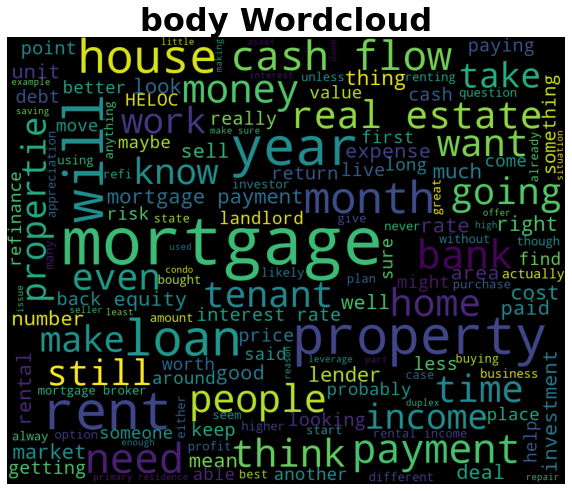

In [22]:
wordcloud_maker(mortgage, 'body')

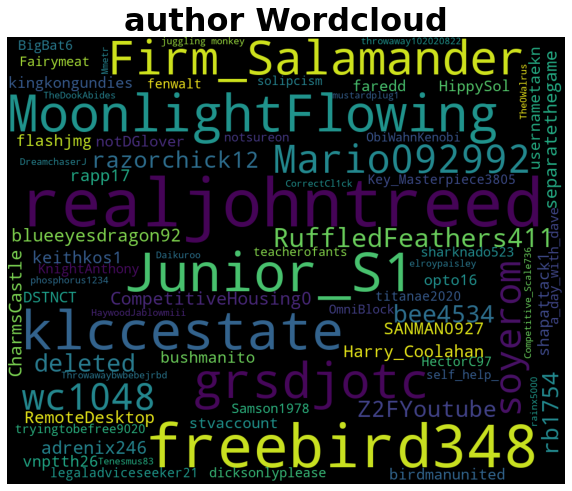

In [23]:
wordcloud_maker(submissions, 'author')

In [24]:
wordcloud_maker(submissions, 'body')

KeyError: 'body'

In [25]:
stopwords_list = stopwords.words('english')

In [26]:
def body_cleaner(comment):
    punctuation = set(string.punctuation)  
    x = comment
    x = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', x) #Remove all links
    x = re.sub(r'@[\w]*', '', x) #remove all @user mentions
    x = ''.join(ch for ch in x if ch not in punctuation) #remove punctuation
    x = x.replace("[^a-zA-z]", " ") #remove special chars
    x = [word.lower() for word in x.split() if word.lower() not in stopwords_list] #lowercase
    return ' '.join(x)

In [27]:
buy['cleaned_body'] = buy['body'].map(lambda x: body_cleaner(x))

<ipython-input-27-23c0690928eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['cleaned_body'] = buy['body'].map(lambda x: body_cleaner(x))


In [28]:
#VADER Classification
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [29]:
buy['body_sentiment'] = buy['cleaned_body'].apply(lambda x: find_sentiment(x))

<ipython-input-29-69ab29205730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['body_sentiment'] = buy['cleaned_body'].apply(lambda x: find_sentiment(x))


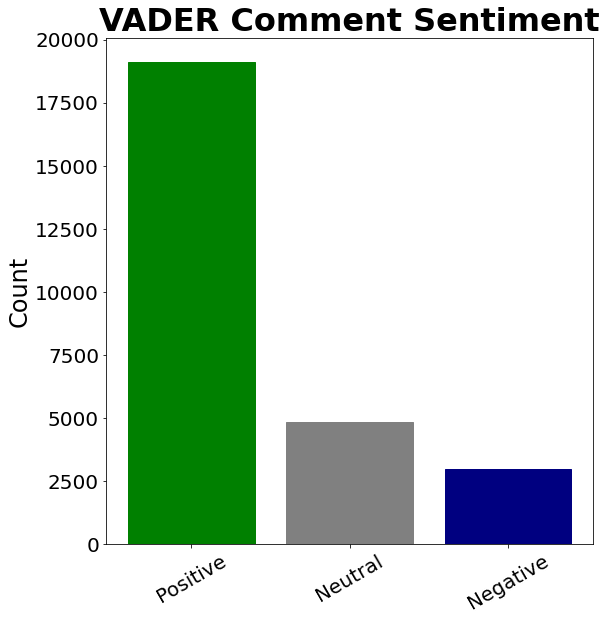

In [30]:
counts = buy['body_sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Positive','Neutral','Negative'],counts)
barlist[0].set_color('green')
barlist[1].set_color('grey')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("VADER Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

# Now we try "sell"

In [31]:
sell['cleaned_body'] = sell['body'].map(lambda x: body_cleaner(x))

In [32]:
sell['body_sentiment'] = sell['cleaned_body'].apply(lambda x: find_sentiment(x))

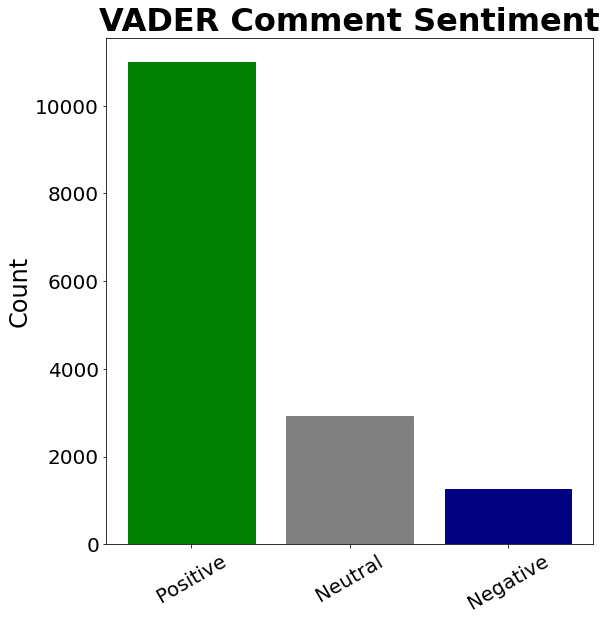

In [33]:
counts = sell['body_sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Positive','Neutral','Negative'],counts)
barlist[0].set_color('green')
barlist[1].set_color('grey')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("VADER Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

# Now we try mortgage

In [34]:
mortgage['cleaned_body'] = mortgage['body'].map(lambda x: body_cleaner(x))

In [35]:
mortgage['body_sentiment'] = mortgage['cleaned_body'].apply(lambda x: find_sentiment(x))

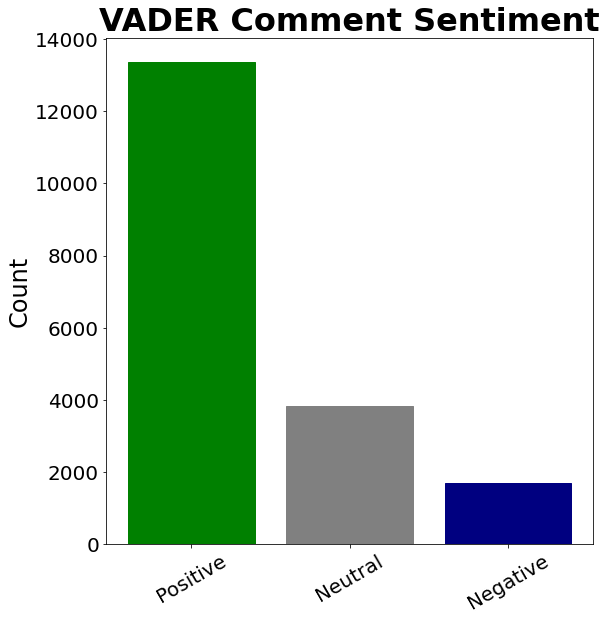

In [36]:
counts = mortgage['body_sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Positive','Neutral','Negative'],counts)
barlist[0].set_color('green')
barlist[1].set_color('grey')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("VADER Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

# Now we try Submissions

In [37]:
submissions['cleaned_body'] = submissions['body'].map(lambda x: body_cleaner(x))

KeyError: 'body'

In [38]:
submissions['body_sentiment'] = submissions['cleaned_body'].apply(lambda x: find_sentiment(x))

KeyError: 'cleaned_body'

In [39]:
counts = submissions['body_sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Positive','Neutral','Negative'],counts)
barlist[0].set_color('green')
barlist[1].set_color('grey')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("VADER Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

KeyError: 'body_sentiment'

In [40]:


#TextBlob Classification
def blob_sent(post):
    blob = TextBlob(post)
    if blob.sentiment.polarity > 0:
        return "Positive"
    elif blob.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"



In [41]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26928 entries, 0 to 26927
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   body                   26928 non-null  object
 1   score                  26928 non-null  int64 
 2   total_awards_received  26928 non-null  int64 
 3   created_utc            26928 non-null  int64 
 4   author                 26928 non-null  object
 5   permalink              26928 non-null  object
 6   cleaned_body           26928 non-null  object
 7   body_sentiment         26928 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


In [42]:
buy['cleaned_body'] = buy['body'].map(lambda x: body_cleaner(x))
buy['blob_sent'] = buy['cleaned_body'].apply(lambda x: blob_sent(x))

<ipython-input-42-688e2ff682c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['cleaned_body'] = buy['body'].map(lambda x: body_cleaner(x))
<ipython-input-42-688e2ff682c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['blob_sent'] = buy['cleaned_body'].apply(lambda x: blob_sent(x))


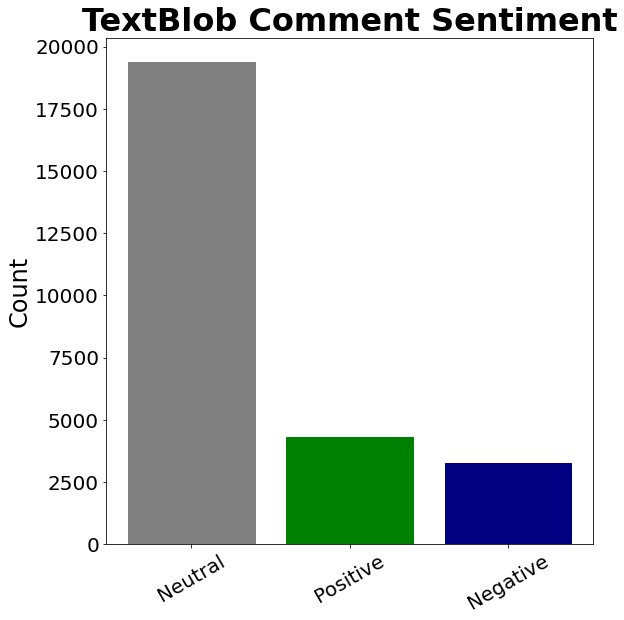

In [43]:
counts = buy['blob_sent'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Neutral','Positive','Negative'],counts)
barlist[0].set_color('grey')
barlist[1].set_color('green')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("TextBlob Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

In [44]:
sell['cleaned_body'] = sell['body'].map(lambda x: body_cleaner(x))
sell['blob_sent'] = sell['cleaned_body'].apply(lambda x: blob_sent(x))

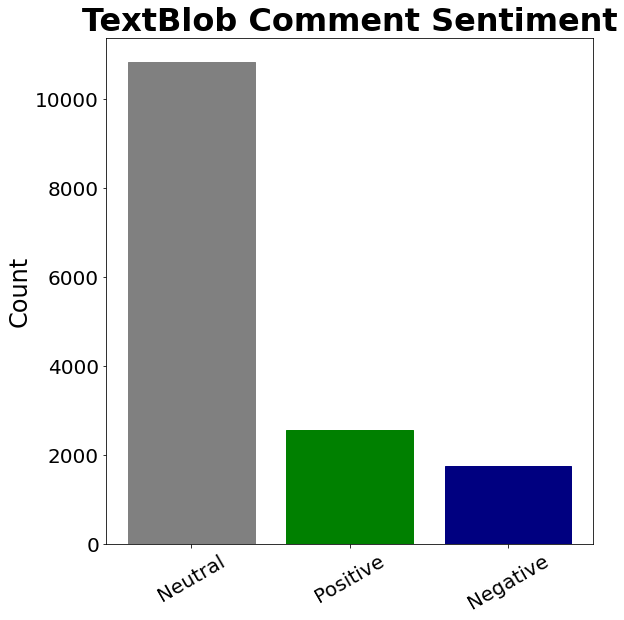

In [45]:
counts = sell['blob_sent'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Neutral','Positive','Negative'],counts)
barlist[0].set_color('grey')
barlist[1].set_color('green')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("TextBlob Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

In [46]:
#Creating preprocessed column for word freq visual
stopwords_list = stopwords.words('english')
stopwords_list.append('amc')
stopwords_list.append('gme')
pattern = r"(?u)\w{3,}"
tokenizer = RegexpTokenizer(pattern)
stemmer = PorterStemmer()
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    text_tokens = tokenizer.tokenize(text)
    text_tokens_stopped = [word for word in text_tokens if word not in stopwords_list]
    final_text = [stemmer.stem(token) for token in text_tokens_stopped]
    return final_text

In [47]:
preprocessed_text = buy.cleaned_body.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

In [48]:
buy['preprocessed'] = preprocessed_text

<ipython-input-48-feabb2cc11a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['preprocessed'] = preprocessed_text


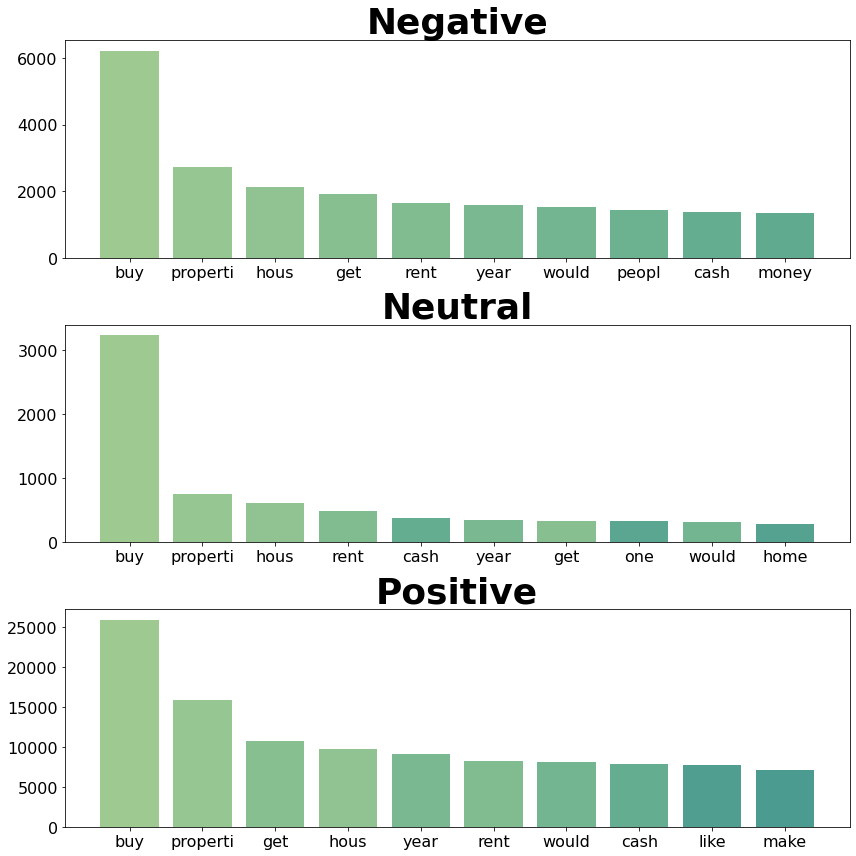

In [49]:


fig, axes = plt.subplots(nrows=3, figsize=(12, 12))
plotted_words_and_colors = {}
color_palette = sns.color_palette('crest', n_colors=38)
data_by_sent = [y for _, y in buy.groupby('body_sentiment', as_index=False)]
for idx, sent_df in enumerate(data_by_sent):
    all_words_in_genre = sent_df.preprocessed.explode()
    top_10 = all_words_in_genre.value_counts()[:10]
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(sent_df.iloc[0].body_sentiment.title(), fontsize=36, fontweight='bold')
    ax.tick_params(labelsize=16)
    
fig.tight_layout()



In [50]:
sell['cleaned_body'] = sell['body'].map(lambda x: body_cleaner(x))
sell['blob_sent'] = sell['cleaned_body'].apply(lambda x: blob_sent(x))

In [51]:
preprocessed_text = sell.cleaned_body.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

In [52]:
sell['preprocessed'] = preprocessed_text

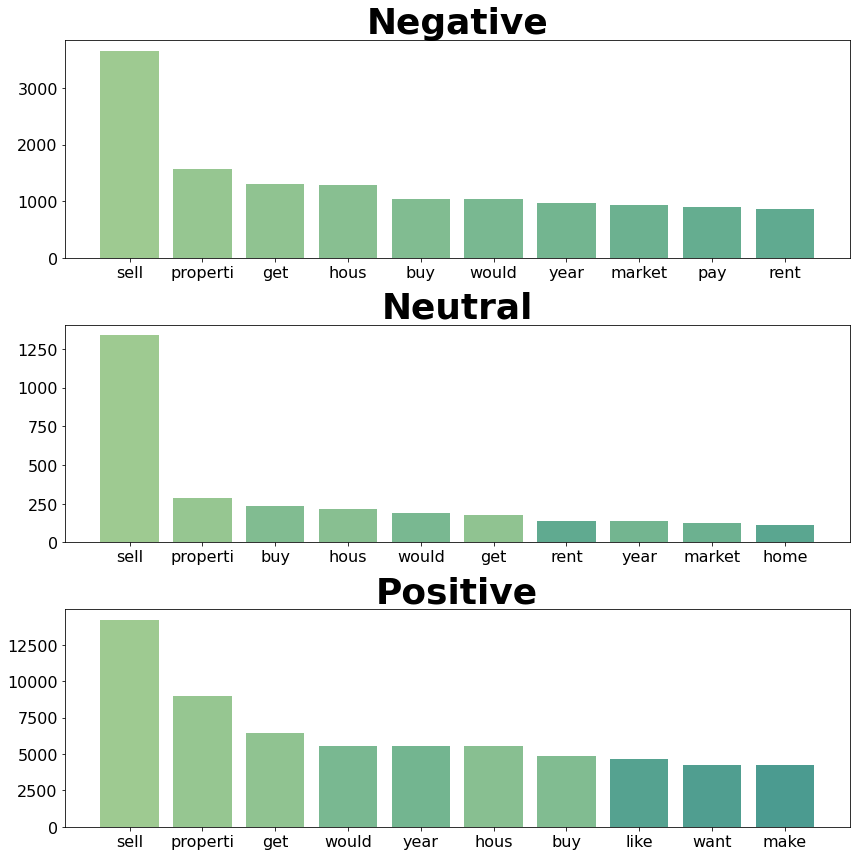

In [53]:


fig, axes = plt.subplots(nrows=3, figsize=(12, 12))
plotted_words_and_colors = {}
color_palette = sns.color_palette('crest', n_colors=38)
data_by_sent = [y for _, y in sell.groupby('body_sentiment', as_index=False)]
for idx, sent_df in enumerate(data_by_sent):
    all_words_in_genre = sent_df.preprocessed.explode()
    top_10 = all_words_in_genre.value_counts()[:10]
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(sent_df.iloc[0].body_sentiment.title(), fontsize=36, fontweight='bold')
    ax.tick_params(labelsize=16)
    
fig.tight_layout()



In [54]:
body_data = buy[['cleaned_body', 'created_utc']].copy()
body_data = body_data.dropna()
body_data['sentiments'] = body_data['cleaned_body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Positive Sentiment'] = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment'] = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment'] = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
body_data['Compound Sentiment'] = body_data['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
body_data.drop(columns=['sentiments'],inplace=True)

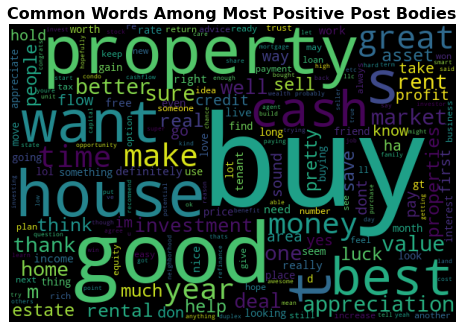

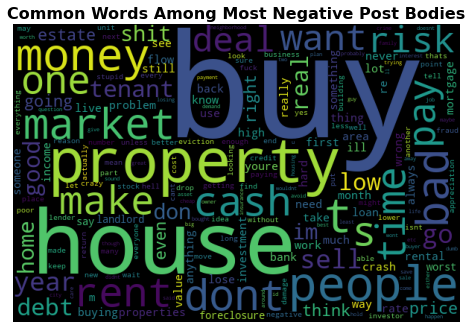

In [55]:


Most_Positive = body_data[body_data['Positive Sentiment'].between(0.4,1)]['cleaned_body']
Most_Negative = body_data[body_data['Negative Sentiment'].between(0.25,1)]['cleaned_body']

Most_Positive_text = ' '.join(Most_Positive)
Most_Negative_text = ' '.join(Most_Negative)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='black').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='black').generate(Most_Negative_text)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Common Words Among Most Positive Post Bodies',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Common Words Among Most Negative Post Bodies',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()



In [56]:
body_data = sell[['cleaned_body', 'created_utc']].copy()
body_data = body_data.dropna()
body_data['sentiments'] = body_data['cleaned_body'].apply(lambda x: sia.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
body_data['Positive Sentiment'] = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment'] = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment'] = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
body_data['Compound Sentiment'] = body_data['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
body_data.drop(columns=['sentiments'],inplace=True)

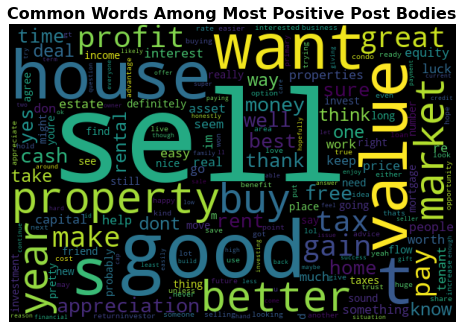

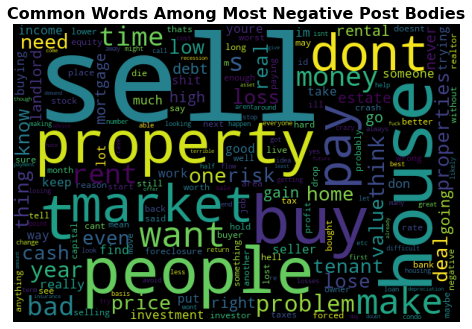

In [57]:


Most_Positive = body_data[body_data['Positive Sentiment'].between(0.4,1)]['cleaned_body']
Most_Negative = body_data[body_data['Negative Sentiment'].between(0.25,1)]['cleaned_body']

Most_Positive_text = ' '.join(Most_Positive)
Most_Negative_text = ' '.join(Most_Negative)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='black').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='black').generate(Most_Negative_text)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Common Words Among Most Positive Post Bodies',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Common Words Among Most Negative Post Bodies',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

